# Integration + Monte-Carlo on integration of the exact solution at the final time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
a = -1
b = 1


# N_mu = 5

here the integrals is computed and we take the mean and the variance (as formulated in the semester project).

In [4]:
N_mu = 5

#Numerical integration
Ns = 2**np.arange(4, 11, 1)
print(Ns)
trials = 200
integrals_N = np.zeros((len(Ns), trials))


for k, N in  enumerate(Ns): 
    print("N = ", N)
    for i in range(trials):
        #print("trial : ", i)
        Mus = np.random.uniform(low = -1, high = 1, size = (N_mu, N))
        X = np.random.uniform(low = 0, high = 1, size = N)
        I_Ns = np.zeros(N)
        for j in range(N):
            #print("j : ", j , ", mus shape : ", Mus[:, j].shape)
            somme = fct(Mus[:,j])
            uex = sol_given_fct2(somme)
            y = (uex)(X[j],1)
            y = y**2
            I_Ns[j] = y
        I_N = np.mean(I_Ns) #(b-a) to the power N_mu because we integrate over a to b, N_mu times.
        integrals_N[k, i] = I_N


[  16   32   64  128  256  512 1024]
N =  16
N =  32
N =  64
N =  128
N =  256
N =  512
N =  1024


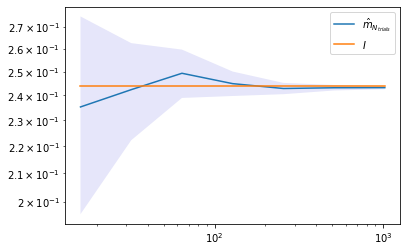

In [5]:
mean_err = np.mean(integrals_N, axis=1)
std_err = np.sqrt(1/(trials-1)*np.sum((integrals_N-mean_err[:, np.newaxis])**2, axis = 1))
plt.plot(Ns, mean_err)
plt.plot(Ns, int_MC(N_mu)*np.ones(len(Ns)))
plt.fill_between(Ns, mean_err-1.96*std_err/np.sqrt(Ns), mean_err+1.96*std_err/np.sqrt(Ns), facecolor='lavender')
plt.yscale('log')
plt.xscale('log')
plt.legend([r"$\hat{m}_{N_{trials}}$", r"$I$"])
#plt.xlabel("N")
#plt.title(r"Monte-Carlo convergence, with $N_\mu = 5$")

# We verify that the convergence is respect for different number of parameters (vary N_mu) IN THE REPORT

In [11]:
N_mus = [1, 5, 10, 15, 20, 25]
Ns = 2**np.arange(6, 10, 1)
trials = 200
print(Ns)
var_I_Ns = np.zeros((len(Ns), len(N_mus)))
for l, N_mu in enumerate(N_mus):
    print("N_mu : ", N_mu)

    #Numerical integration
    I_Ns = np.zeros((len(Ns), trials))

    for k, N in  enumerate(Ns): 
        for i in range(trials):
            Mus = np.random.uniform(low = -1, high = 1, size = (N_mu, N))
            X = np.random.uniform(low = 0, high = 1, size = N)
            I_N = np.zeros(N)
            for j in range(N):
                somme = fct(Mus[:,j])
                uex = sol_given_fct2(somme)
                y = (uex)(X[j],1)
                y = y**2
                I_N[j] = y
            I_Ns[k, i] = np.mean(I_N) 
    m_trials=np.mean(I_Ns, axis=1)
    print("approximated integral : ", m_trials)
    var_I_Ns[:, l] = 1/(trials-1)*np.sum((I_Ns-m_trials[:, np.newaxis])**2, axis = 1)
    print("approximated variance : ", var_I_Ns[:, l] )
    

[ 64 128 256 512]
N_mu :  1
approximated integral :  [0.16611785 0.16861303 0.16689259 0.16590006]
approximated variance :  [7.21179671e-04 3.16488834e-04 1.42797084e-04 8.78284915e-05]
N_mu :  5
approximated integral :  [0.23941966 0.24563351 0.24363657 0.24432852]
approximated variance :  [0.00165312 0.0009252  0.00047672 0.00021171]
N_mu :  10
approximated integral :  [0.25887622 0.25954241 0.25659018 0.25926389]
approximated variance :  [0.00220161 0.00085369 0.00044808 0.00023454]
N_mu :  15
approximated integral :  [0.26408675 0.26482278 0.26472583 0.26635771]
approximated variance :  [0.00180184 0.00113207 0.00049373 0.00025896]
N_mu :  20
approximated integral :  [0.26281393 0.26612786 0.26448398 0.26947417]
approximated variance :  [0.0020016  0.00098015 0.00050406 0.00026668]
N_mu :  25
approximated integral :  [0.27123674 0.26943197 0.26997744 0.2668221 ]
approximated variance :  [0.00223243 0.00092817 0.00049721 0.00026754]


for N_mu= 1  the exact integral is :  0.16666666666666666
for N_mu= 5  the exact integral is :  0.2439351851851852
for N_mu= 10  the exact integral is :  0.2582946218610901
for N_mu= 15  the exact integral is :  0.2634067139074978
for N_mu= 20  the exact integral is :  0.2660272073188372
for N_mu= 25  the exact integral is :  0.2676205672651668


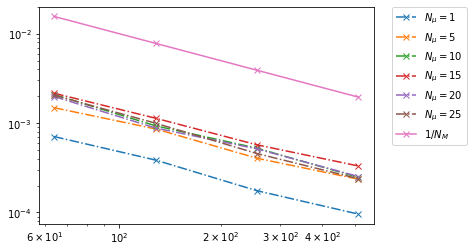

In [10]:
legend=[]
for i, N_mu in enumerate(N_mus):
    plt.plot(Ns, var_I_Ns[:, i], '-.x')
    legend.append(r"$N_\mu = $" + str(N_mu))
    print("for N_mu=", N_mu, " the exact integral is : ", int_MC(N_mu))
legend.append(r"$1/N_M$")
plt.plot(Ns, 1/Ns, 'x-')
plt.yscale('log')
plt.xscale('log')
plt.legend(legend, bbox_to_anchor=(1.04,1.02))
